<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [7]:
boston_df.shape

(506, 14)

In [8]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Text(0.5, 1.0, 'Median value of owner-occupied homes histogram')

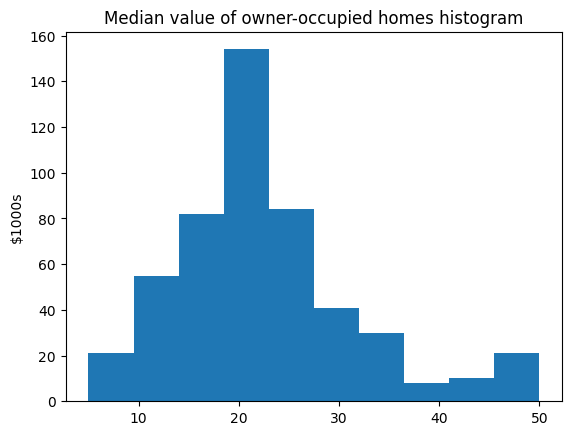

In [33]:
pyplot.hist(boston_df['MEDV'])
pyplot.ylabel('$1000s')
pyplot.title('Median value of owner-occupied homes histogram')

[Text(0, 0.5, '$1000s'),
 Text(0.5, 1.0, 'Median value of owner-occupied homes')]

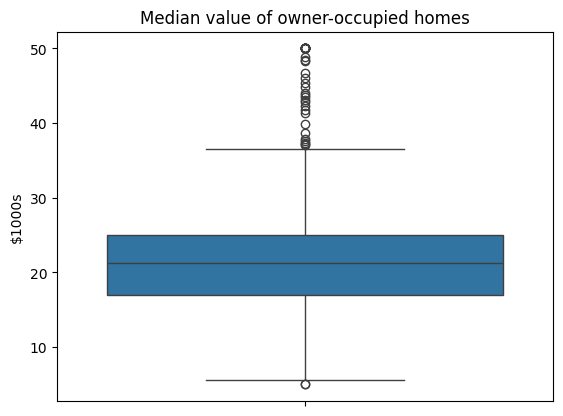

In [17]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set(ylabel='$1000s', title="Median value of owner-occupied homes")

[Text(0.5, 0, 'Charles River bound'),
 Text(0, 0.5, '$1000s'),
 Text(0.5, 1.0, 'Median value of owner-occupied homes')]

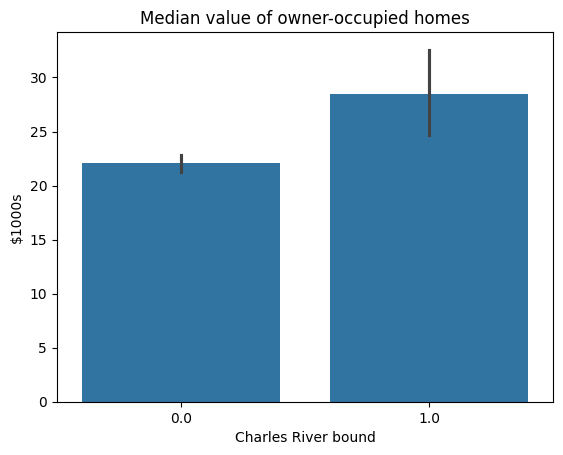

In [18]:
ax = sns.barplot(x="CHAS", y="MEDV", data=boston_df)
ax.set(xlabel= 'Charles River bound',ylabel='$1000s', title ="Median value of owner-occupied homes")

In [24]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

[Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, '$1000s'),
 Text(0.5, 1.0, 'Median value of owner-occupied homes')]

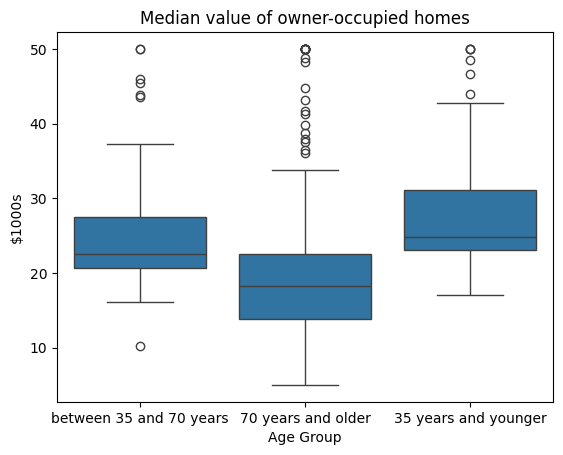

In [25]:
ax = sns.boxplot(x= 'age_group', y='MEDV', data=boston_df)
ax.set(xlabel='Age Group',ylabel='$1000s', title="Median value of owner-occupied homes")

[Text(0.5, 0, 'Anitric oxides concentration (parts per 10 million)'),
 Text(0, 0.5, 'proportion of non-retail business acres per town'),
 Text(0.5, 1.0, 'Median value of owner-occupied homes')]

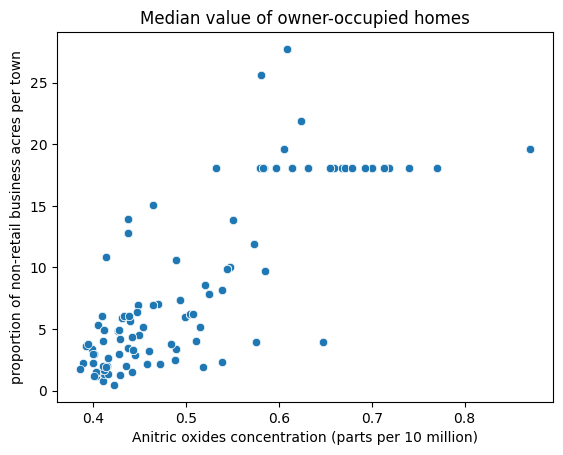

In [26]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set(xlabel='Anitric oxides concentration (parts per 10 million)',ylabel='proportion of non-retail business acres per town', title="Median value of owner-occupied homes")

What can you say about the relationship? Looks like the higher the Nitric oxide the higher the non-retail business acres.

Text(0.5, 1.0, 'pupil-teacher ratio by town')

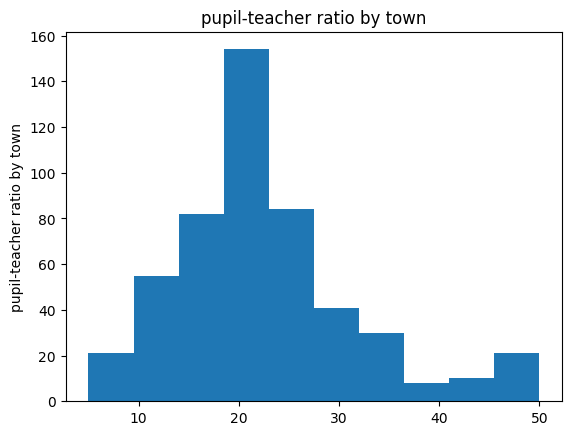

In [31]:
pyplot.hist(boston_df['MEDV'])
pyplot.ylabel('pupil-teacher ratio by town')
pyplot.title('pupil-teacher ratio by town histogram')

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State your hypothesis. - There is no significant difference in median value of houses bounded by the Charles river or not. α = 0.05

In [36]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

pvalue=7.390623170519905e-05 is significantly less than α so we can reject the hypothesis.  There is significant difference in median value of houses bounded by the Charles river or not.

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State your hypothesis. - There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE). α = 0.05

In [37]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [38]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


P-Value: 1.7105011022702984e-15 is significantly less than α so we can reject the hypothesis. There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State your hypothesis. - There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. α = 0.05

In [39]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

pvalue=7.913361061210442e-98 is less than 0.05 so we can reject the hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [40]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ DIS', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq         F        PR(>F)
DIS         1.0   2668.246572  2668.246572  33.57957  1.206612e-08
Residual  504.0  40048.048843    79.460414       NaN           NaN


In [ ]:
1.206612e-08 is less than 0.05 so we can reject the